In [1]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 23.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 87.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 49.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.0/383.0 kB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 29.5 MB/s eta 0:00:00
   ━━━

In [3]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.utils import AirPassengersDF

df = AirPassengersDF
sf = StatsForecast(
    models = [AutoARIMA(season_length = 12)],
    freq = 'ME'
)

sf.fit(df)
sf.predict(h=12, level=[95])

/opt/venv/lib/python3.10/site-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
unique_id,,,,
1.0,1961-01-31,444.300049,421.268555,467.331543
1.0,1961-02-28,418.210022,390.097198,446.322845
1.0,1961-03-31,446.237030,412.750214,479.723877
1.0,1961-04-30,488.228943,450.411591,526.046265
1.0,1961-05-31,499.231354,457.451813,541.010925
1.0,1961-06-30,562.230652,516.855286,607.606018
1.0,1961-07-31,649.230835,600.518311,697.943359
1.0,1961-08-31,633.230774,581.397217,685.064392
1.0,1961-09-30,535.230774,480.453217,590.008362


In [5]:
import os

import pandas as pd

In [26]:
# this makes it so that the outputs of the predict methods have the id as a column 
# instead of as the index
os.environ['NIXTLA_ID_AS_COL'] = '1'

df = pd.read_csv('data/air-passengers.csv', parse_dates=['ds'])
# df.rename(columns={'Month': 'ds', 'Passengers': 'y'}, inplace=True)
# df['unique_id'] = df.index
df.head()

,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


In [27]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

sf = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='ME',
)

sf.fit(df)

StatsForecast(models=[AutoARIMA])

In [28]:
forecast_df = sf.predict(h=12, level=[90])
forecast_df.tail()

,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
7,AirPassengers,1961-07-31,633.230774,589.730652,676.730896
8,AirPassengers,1961-08-31,535.230774,489.260010,581.201599
9,AirPassengers,1961-09-30,488.230804,439.915619,536.545959
10,AirPassengers,1961-10-31,417.230804,366.679810,467.781799
11,AirPassengers,1961-11-30,459.230804,406.538788,511.922821


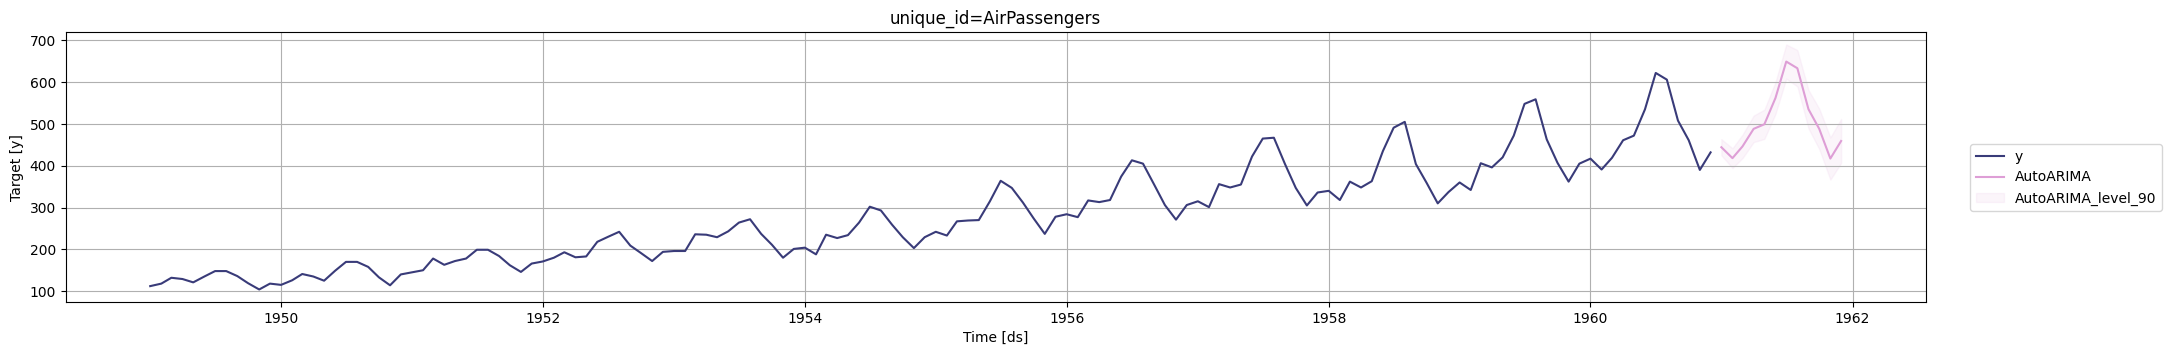

In [29]:
sf.plot(df, forecast_df, level=[90])

In [30]:
Y_df = pd.read_parquet('https://datasets-nixtla.s3.amazonaws.com/m4-hourly.parquet')
Y_df.head()

,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0


In [31]:
uids = Y_df['unique_id'].unique()[:10] # Select 10 ids to make the example faster
Y_df = Y_df.query('unique_id in @uids')
Y_df = Y_df.groupby('unique_id').tail(7 * 24) #Select last 7 days of data to make example faster

In [32]:
from statsforecast import StatsForecast

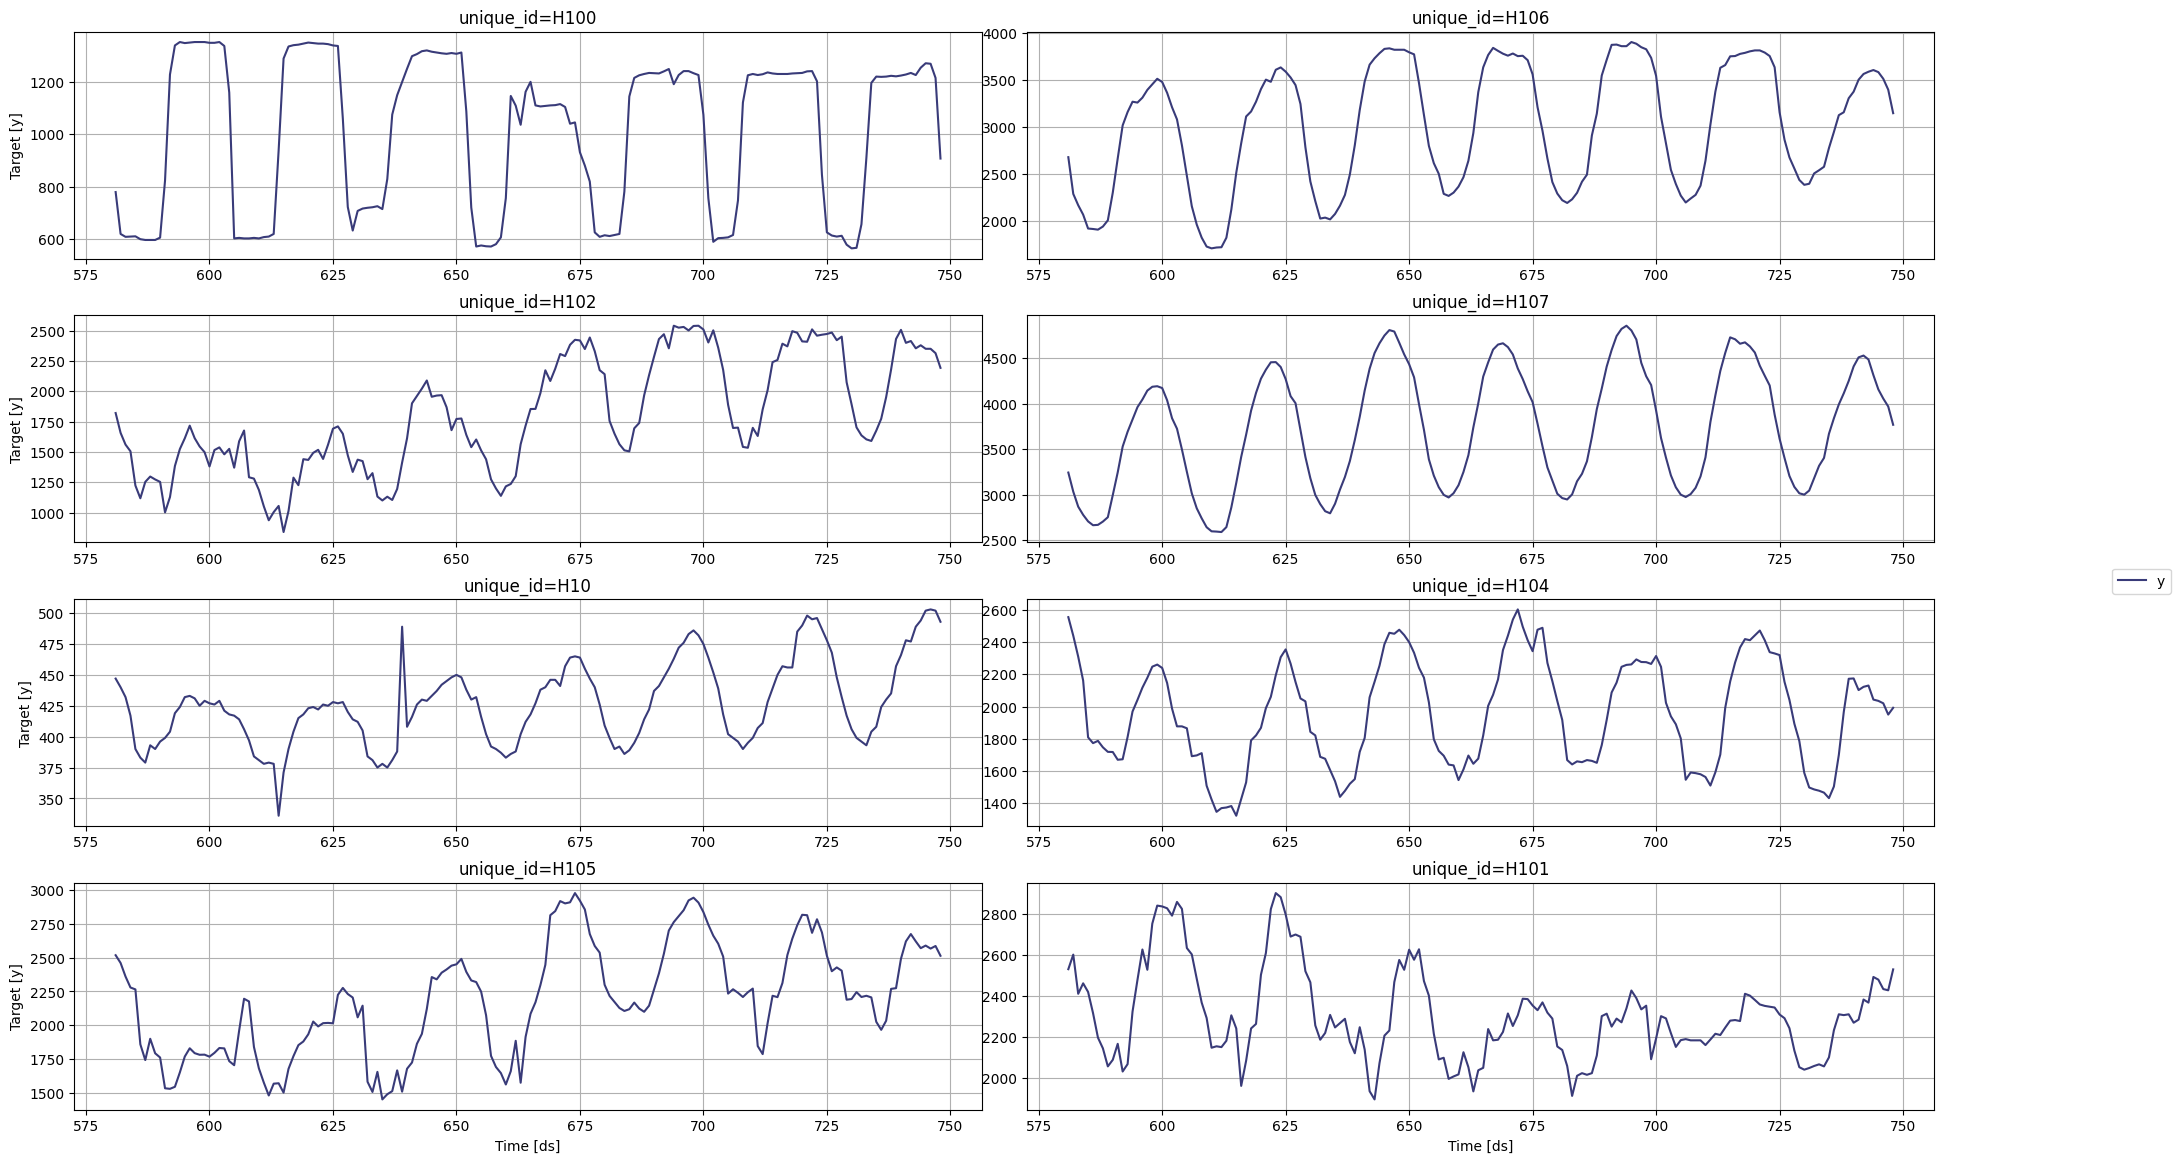

In [33]:
StatsForecast.plot(Y_df)

In [34]:
from statsforecast.models import (
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)

In [35]:
# Create a list of models and instantiation parameters
models = [
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=24),
    HistoricAverage(),
    DOT(season_length=24)
]

In [36]:
# Instantiate StatsForecast class as sf
sf = StatsForecast( 
    models=models,
    freq=1, 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1,
)

In [37]:
forecasts_df = sf.forecast(df=Y_df, h=48, level=[90])
forecasts_df.head()

,unique_id,ds,HoltWinters,HoltWinters-lo-90,HoltWinters-hi-90,CrostonClassic,CrostonClassic-lo-90,CrostonClassic-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,HistoricAverage,HistoricAverage-lo-90,HistoricAverage-hi-90,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-90,DynamicOptimizedTheta-hi-90
0,H1,749,829.0,-246.367554,1904.367554,829.0,-246.367554,1904.367554,635.0,537.471191,732.528809,660.982117,398.03775,923.926514,592.701843,577.677307,611.652649
1,H1,750,807.0,-268.367554,1882.367554,807.0,-268.367554,1882.367554,572.0,474.471222,669.528809,660.982117,398.03775,923.926514,525.589111,505.449738,546.621826
2,H1,751,785.0,-290.367554,1860.367554,785.0,-290.367554,1860.367554,532.0,434.471222,629.528809,660.982117,398.03775,923.926514,489.251801,462.072876,512.424133
3,H1,752,756.0,-319.367554,1831.367554,756.0,-319.367554,1831.367554,493.0,395.471222,590.528809,660.982117,398.03775,923.926514,456.195038,430.554291,478.260956
4,H1,753,719.0,-356.367554,1794.367554,719.0,-356.367554,1794.367554,477.0,379.471222,574.528809,660.982117,398.03775,923.926514,436.290527,411.051239,461.815948


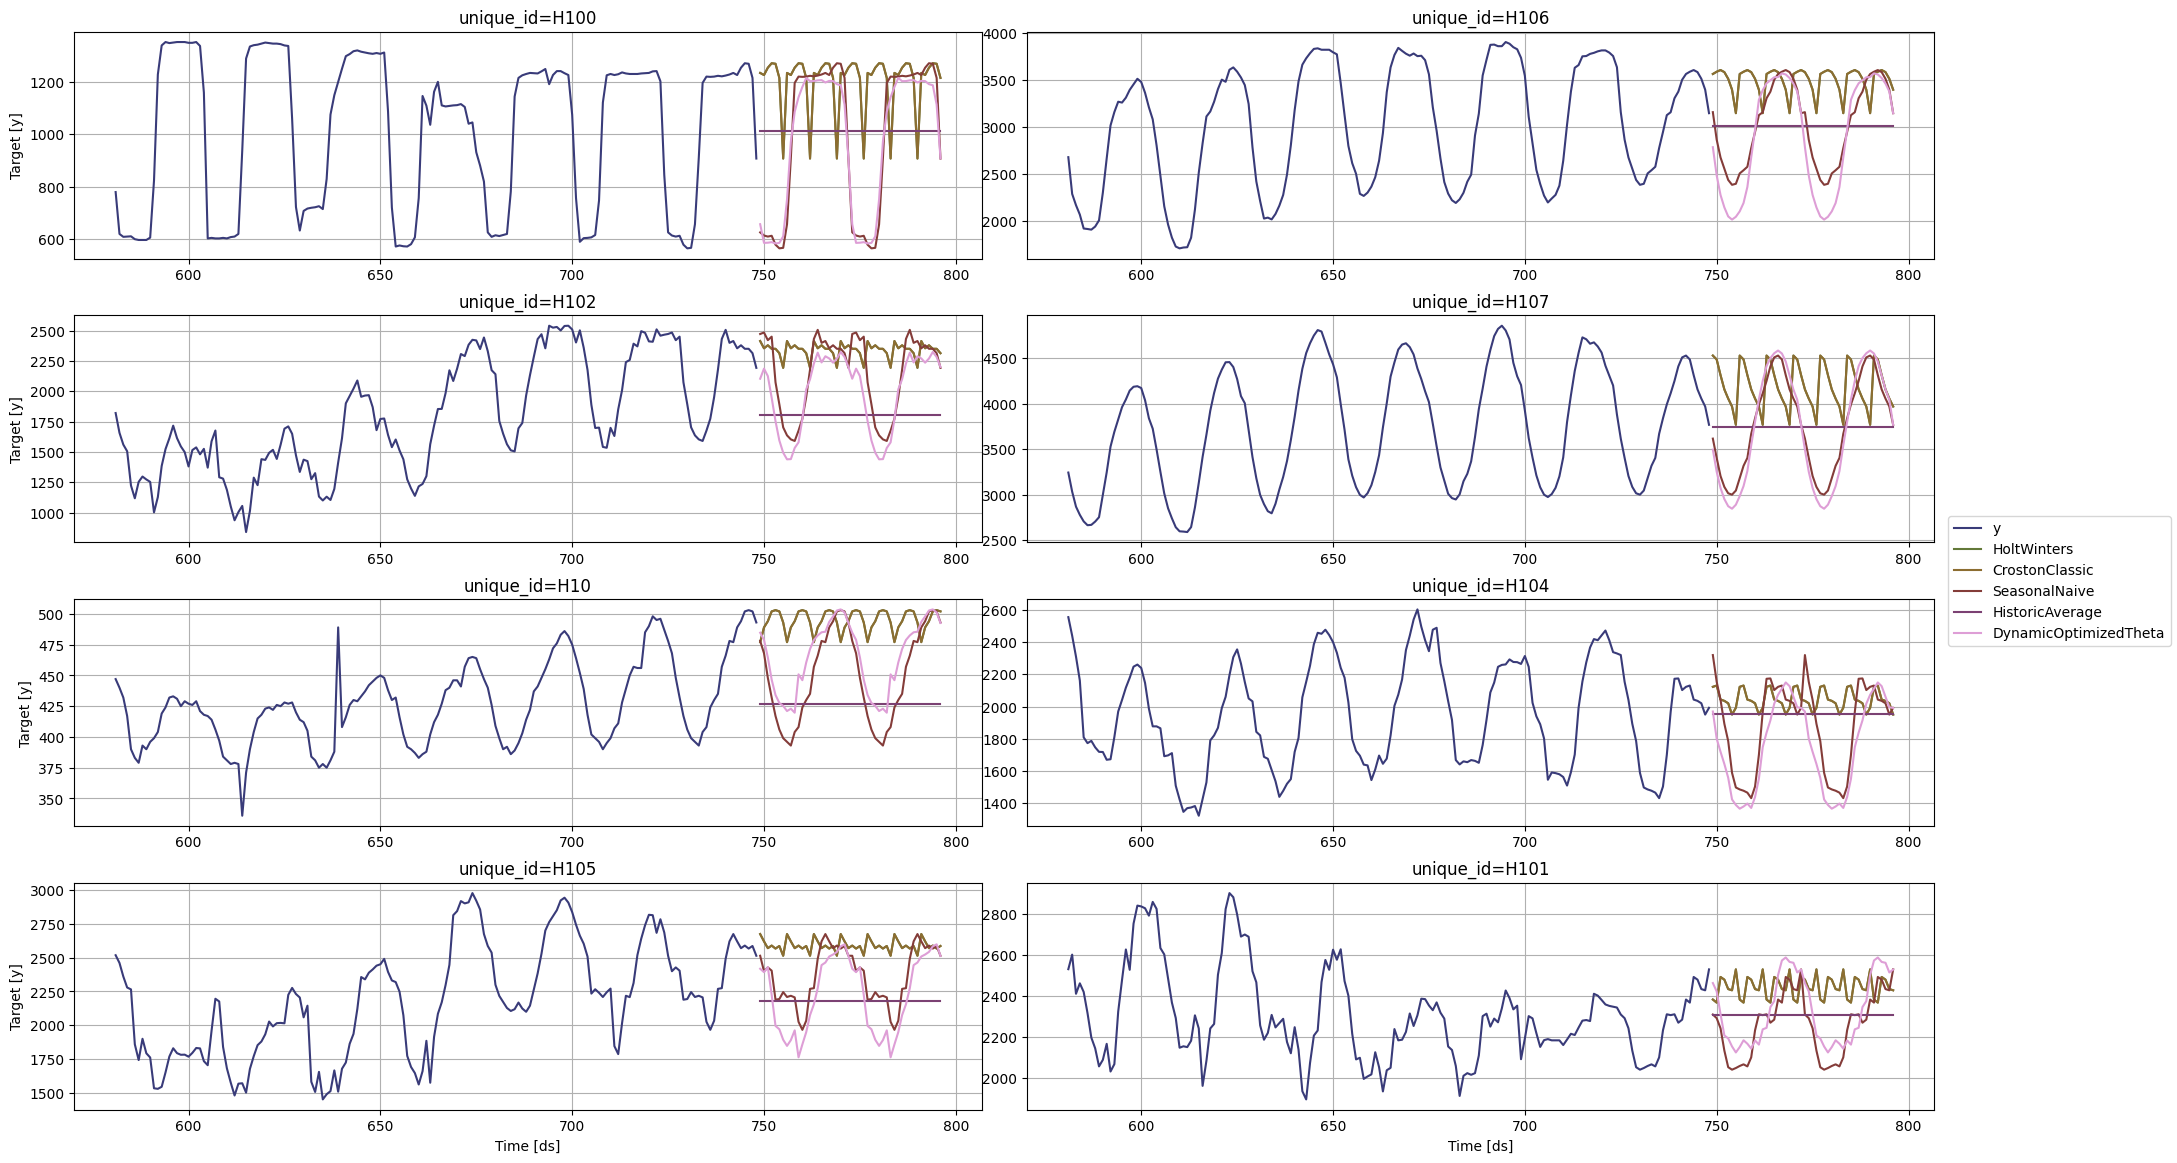

In [38]:
sf.plot(Y_df, forecasts_df)

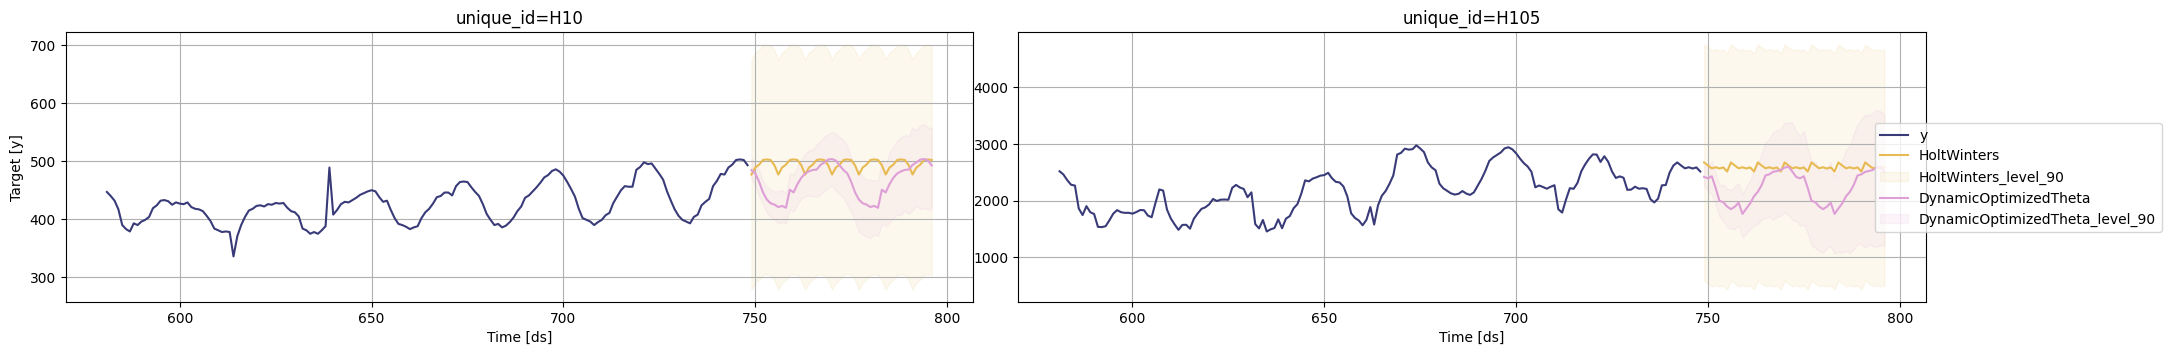

In [39]:
# Plot to unique_ids and some selected models
sf.plot(Y_df, forecasts_df, models=["HoltWinters","DynamicOptimizedTheta"], unique_ids=["H10", "H105"], level=[90])

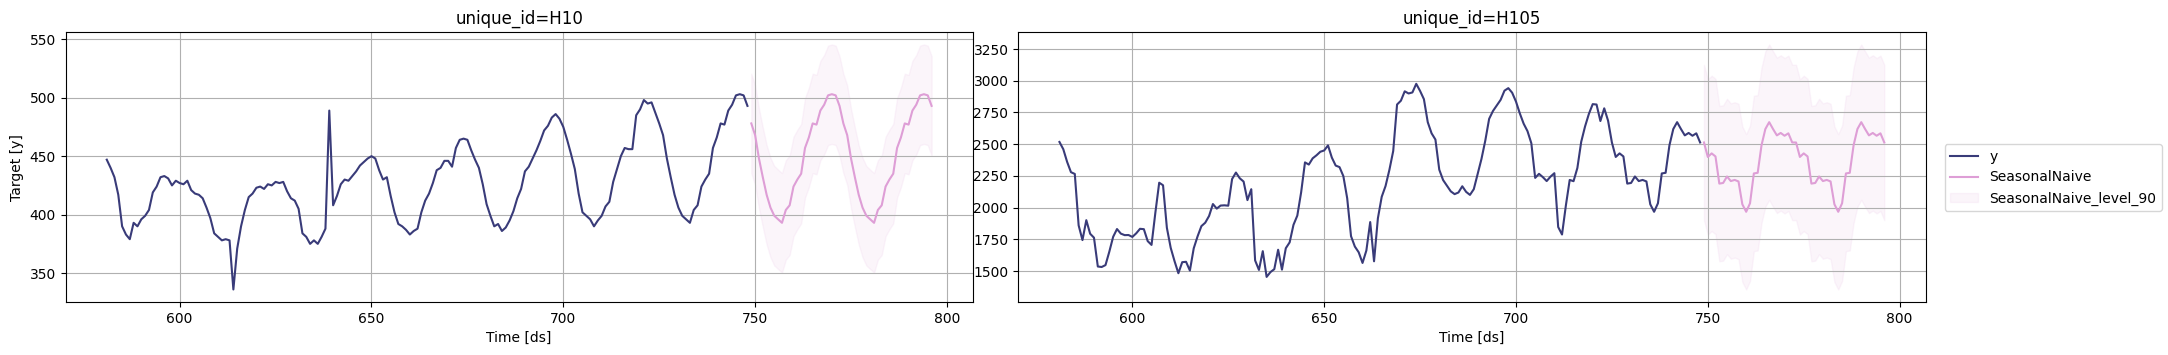

In [40]:
# Explore other models 
sf.plot(Y_df, forecasts_df, models=["SeasonalNaive"], unique_ids=["H10", "H105"], level=[90])

In [41]:
crossvaldation_df = sf.cross_validation(
    df=Y_df,
    h=24,
    step_size=24,
    n_windows=2
)

In [42]:
from utilsforecast.losses import mse
from utilsforecast.evaluation import evaluate

In [43]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [44]:
evaluation_df = evaluate_cross_validation(crossvaldation_df, mse)
evaluation_df.head()

,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,best_model
unique_id,,,,,,
H1,44888.019531,28038.736328,1422.666748,20927.664062,1296.333984,DynamicOptimizedTheta
H10,2812.916504,1483.484131,96.895828,1980.367432,379.621124,SeasonalNaive
H100,121625.375000,91945.140625,12019.000000,78491.187500,21699.648438,SeasonalNaive
H101,28453.394531,16183.634766,10944.458008,18208.404297,63698.082031,SeasonalNaive
H102,232924.843750,132655.296875,12699.896484,309110.468750,31393.519531,SeasonalNaive


In [45]:
summary_df = evaluation_df.groupby('best_model').size().sort_values().to_frame()
summary_df.reset_index().columns = ["Model", "Nr. of unique_ids"]

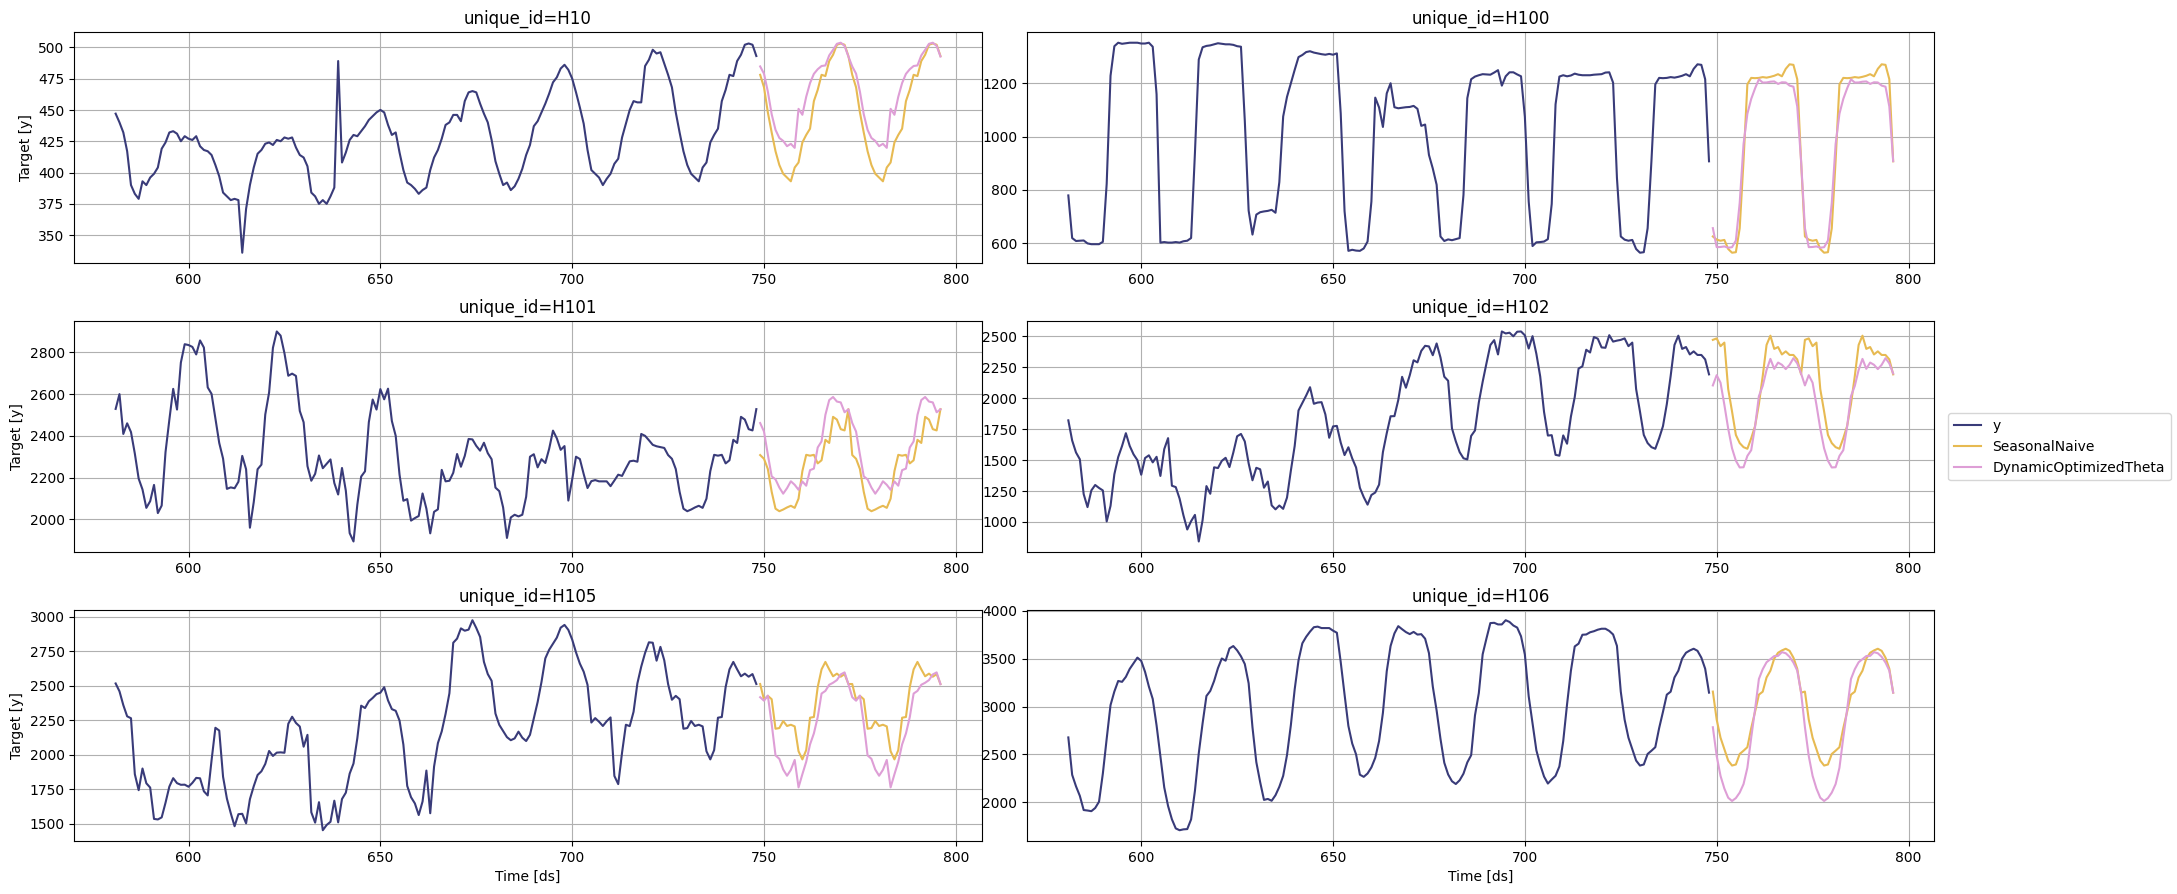

In [46]:
seasonal_ids = evaluation_df.query('best_model == "SeasonalNaive"').index
sf.plot(Y_df,forecasts_df, unique_ids=seasonal_ids, models=["SeasonalNaive","DynamicOptimizedTheta"])

In [47]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    df = forecasts_df.set_index(['unique_id', 'ds']).stack().to_frame().reset_index(level=2) # Wide to long 
    df.columns = ['model', 'best_model_forecast'] 
    df = df.join(evaluation_df[['best_model']])
    df = df.query('model.str.replace("-lo-90|-hi-90", "", regex=True) == best_model').copy()
    df.loc[:, 'model'] = [model.replace(bm, 'best_model') for model, bm in zip(df['model'], df['best_model'])]
    df = df.drop(columns='best_model').set_index('model', append=True).unstack()
    df.columns = df.columns.droplevel()
    df.columns.name = None
    df = df.reset_index()
    return df

In [48]:
prod_forecasts_df = get_best_model_forecast(forecasts_df, evaluation_df)
prod_forecasts_df.head()

,unique_id,ds,best_model,best_model-hi-90,best_model-lo-90
0,H1,749,592.701843,611.652649,577.677307
1,H1,750,525.589111,546.621826,505.449738
2,H1,751,489.251801,512.424133,462.072876
3,H1,752,456.195038,478.260956,430.554291
4,H1,753,436.290527,461.815948,411.051239


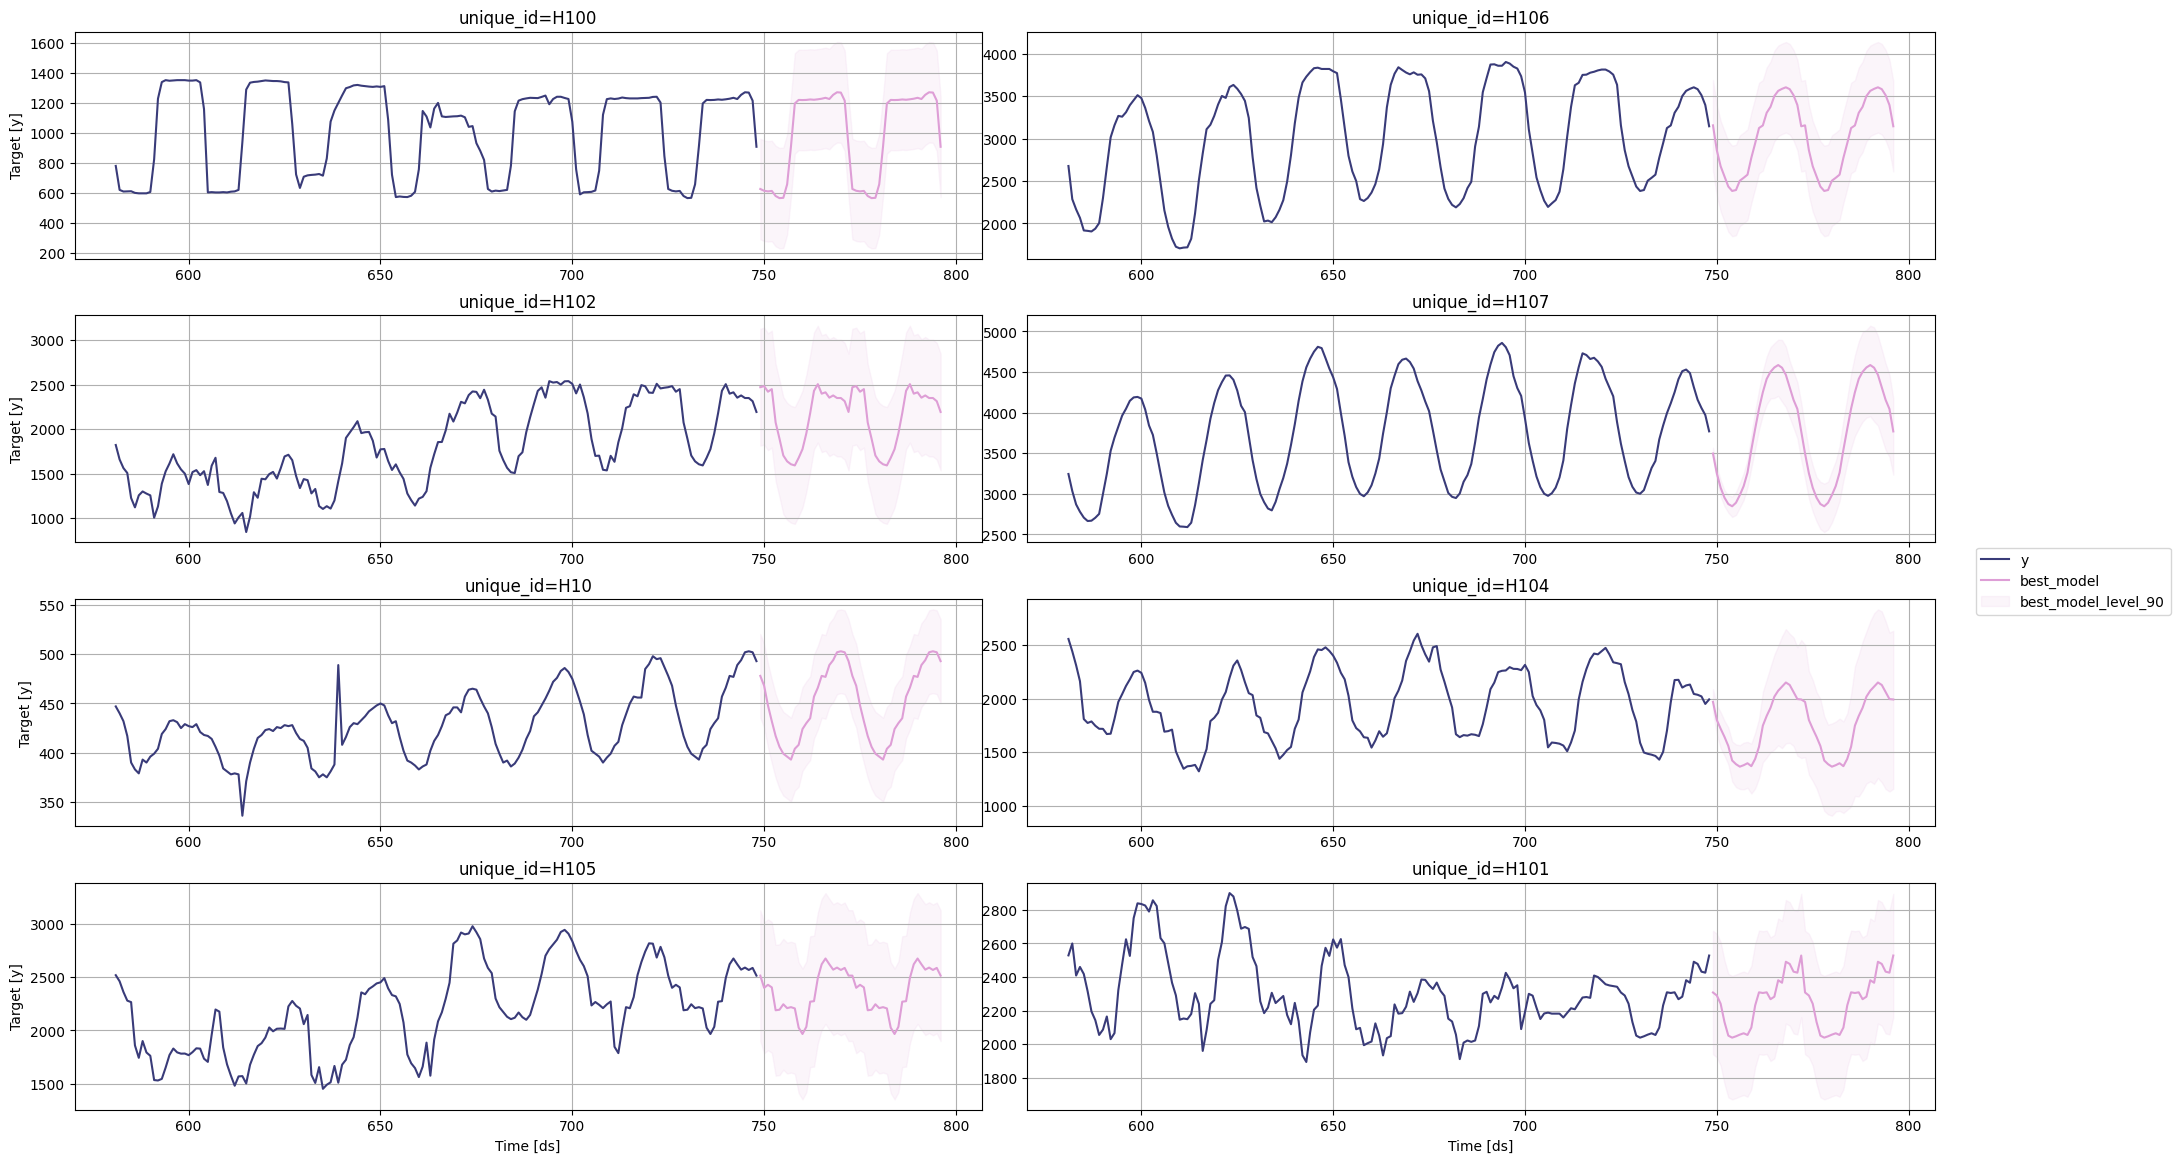

In [49]:
sf.plot(Y_df, prod_forecasts_df, level=[90])